In [3]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import skew, kurtosis

# Load dataset
df = pd.read_csv("../data/peptide_analysis_results.csv")

# Display basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   parent_protein_id                     14907 non-null  object 
 1   protein_seq                           14907 non-null  object 
 2   start_position                        14907 non-null  int64  
 3   end_position                          14907 non-null  int64  
 4   peptide_seq                           14907 non-null  object 
 5   chou_fasman                           14907 non-null  float64
 6   emini                                 14907 non-null  float64
 7   kolaskar_tongaonkar                   14907 non-null  float64
 8   parker                                14907 non-null  float64
 9   isoelectric_point                     14907 non-null  float64
 10  aromaticity                           14907 non-null  float64
 11  hydrophobicity 

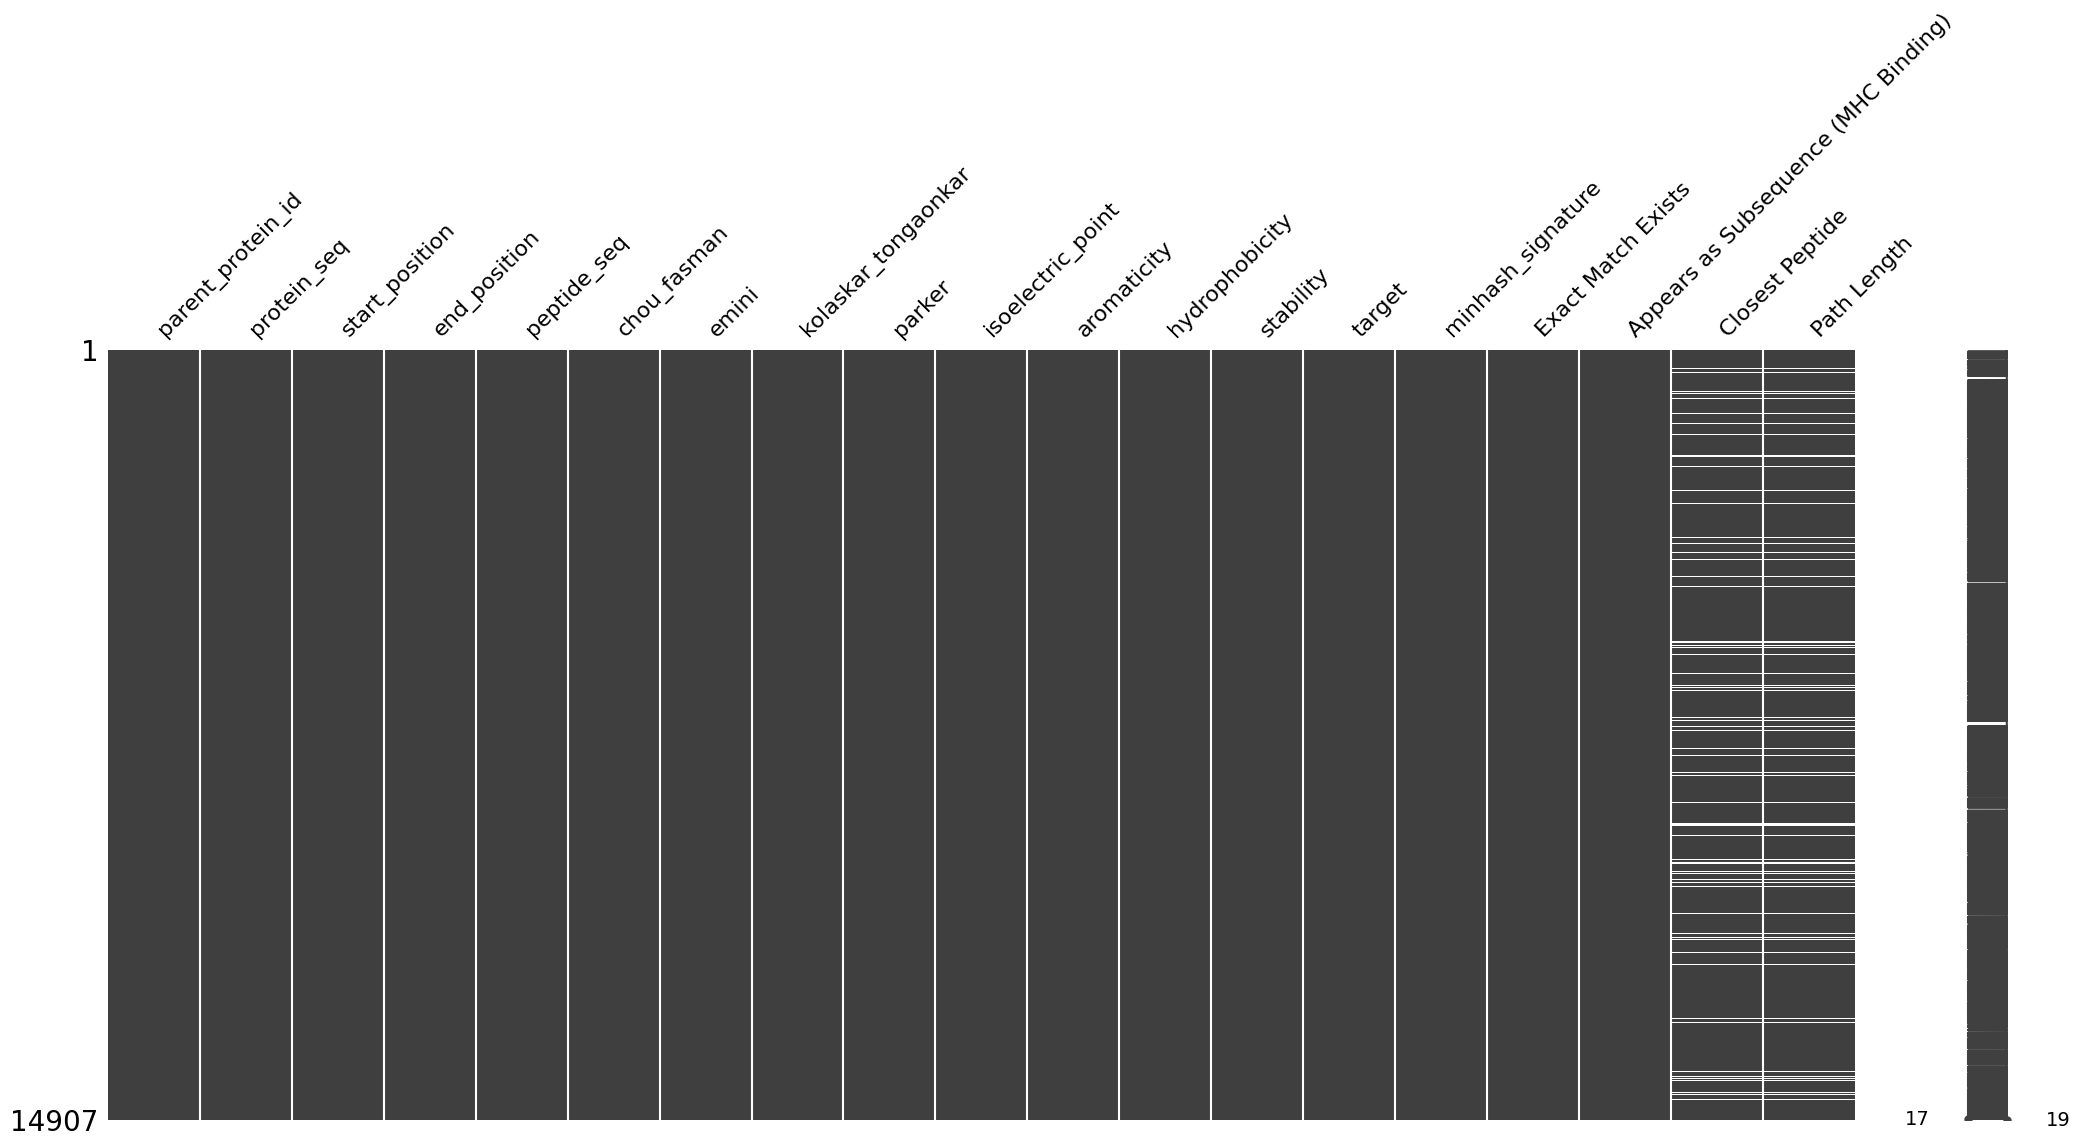

Missing Values:
 Closest Peptide    1317
Path Length        1317
dtype: int64


In [2]:
# Visualize missing values
msno.matrix(df)
plt.show()

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


In [3]:
df.dropna(subset=["Closest Peptide", "Path Length"], inplace=True)


In [4]:
# Fill missing categorical values safely
df.loc[:, "Closest Peptide"] = df["Closest Peptide"].fillna("Unknown")

# Fill missing numerical values safely
df.loc[:, "Path Length"] = df["Path Length"].fillna(df["Path Length"].median())

# Verify that missing values are handled
print(df.isnull().sum())  # Should print 0 for all columns


parent_protein_id                       0
protein_seq                             0
start_position                          0
end_position                            0
peptide_seq                             0
chou_fasman                             0
emini                                   0
kolaskar_tongaonkar                     0
parker                                  0
isoelectric_point                       0
aromaticity                             0
hydrophobicity                          0
stability                               0
target                                  0
minhash_signature                       0
Exact Match Exists                      0
Appears as Subsequence (MHC Binding)    0
Closest Peptide                         0
Path Length                             0
dtype: int64


C:\Users\dedee\AppData\Local\Temp\ipykernel_1564\3627051019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette="coolwarm")


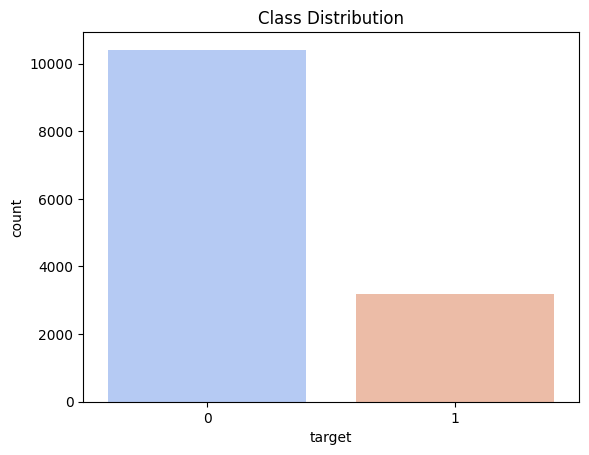

In [5]:
sns.countplot(x='target', data=df, palette="coolwarm")
plt.title("Class Distribution")
plt.show()


target
0    10412
1     3178
Name: count, dtype: int64


C:\Users\dedee\AppData\Local\Temp\ipykernel_1564\1646604074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="coolwarm")


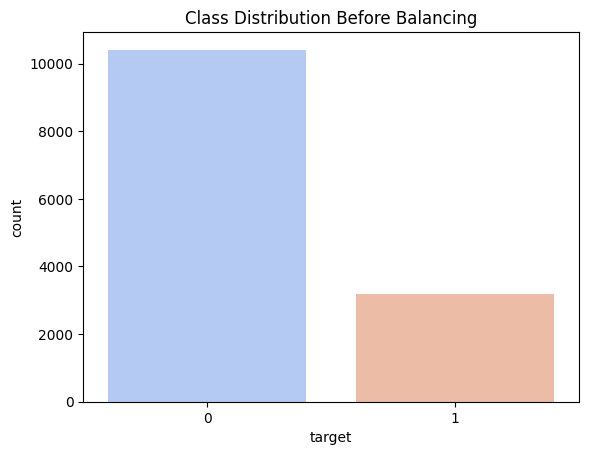

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_counts = df["target"].value_counts()
print(class_counts)

# Plot class distribution
sns.countplot(x="target", data=df, palette="coolwarm")
plt.title("Class Distribution Before Balancing")
plt.show()


In [7]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
X["Path Length"] = X["Path Length"].fillna(X["Path Length"].mean())


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns if present
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


In [17]:
print(X.isnull().sum())  # Check for missing values


parent_protein_id                       0
protein_seq                             0
start_position                          0
end_position                            0
peptide_seq                             0
chou_fasman                             0
emini                                   0
kolaskar_tongaonkar                     0
parker                                  0
isoelectric_point                       0
aromaticity                             0
hydrophobicity                          0
stability                               0
target                                  0
minhash_signature                       0
Exact Match Exists                      0
Appears as Subsequence (MHC Binding)    0
Closest Peptide                         0
Path Length                             0
dtype: int64


In [21]:
# Define target variable (assuming 'target' is your label column)
y = X["target"].values  # Extract as NumPy array
y = y.ravel()  # Flatten into a 1D array


In [24]:
from collections import Counter

print(Counter(y))


Counter({0: 10865, 1: 4042})


In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features and target
X = df.drop(columns=["target"])
y = df["target"]

# Encode categorical variables if needed
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Ensure y is a 1D array
y = y.values.ravel()

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["target"] = y_resampled

# Check new class distribution
print("New Class Distribution:", Counter(df_resampled["target"]))


New Class Distribution: Counter({0: 10865, 1: 10865})


In [26]:
print(df_resampled["target"].value_counts())


target
0    10865
1    10865
Name: count, dtype: int64


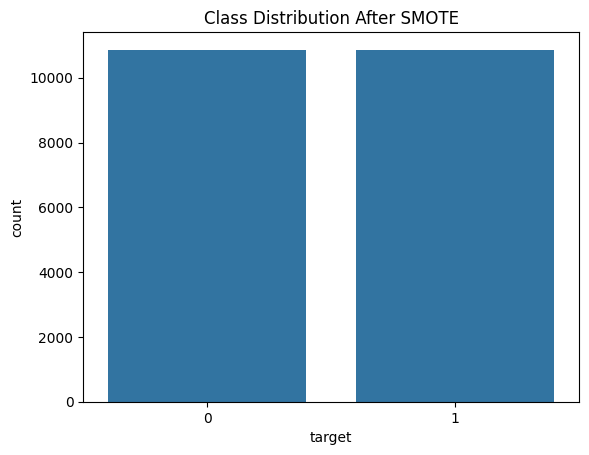

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_resampled["target"])
plt.title("Class Distribution After SMOTE")
plt.show()


In [28]:
df_resampled.to_csv("../data/balanced_peptide_data.csv", index=False)
print("Balanced dataset saved successfully!")


Balanced dataset saved successfully!


In [29]:
print(df_resampled.columns)


Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'minhash_signature', 'Exact Match Exists',
       'Appears as Subsequence (MHC Binding)', 'Closest Peptide',
       'Path Length', 'target'],
      dtype='object')


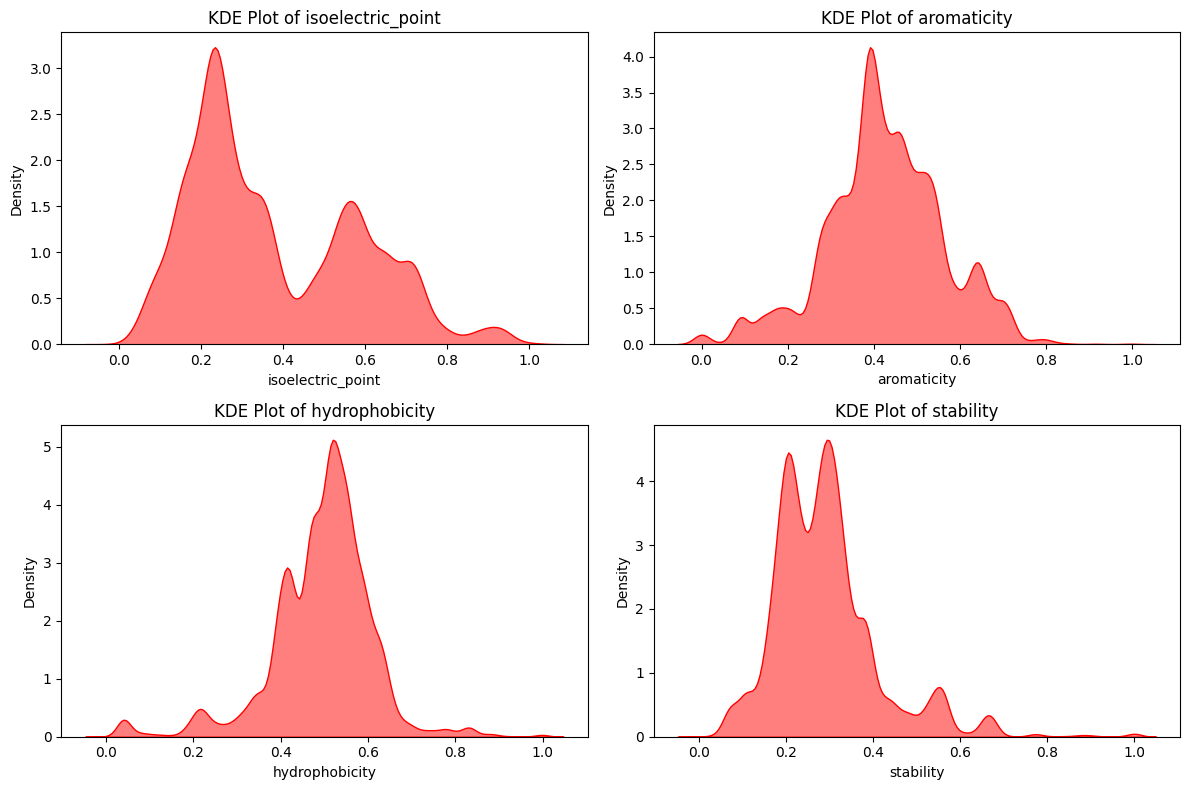

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important peptide features
peptide_features = ["isoelectric_point", "aromaticity", "hydrophobicity", "stability"]

# Plot KDE for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(peptide_features):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df_resampled[feature], fill=True, color="red", alpha=0.5)
    plt.title(f"KDE Plot of {feature}")

plt.tight_layout()
plt.show()


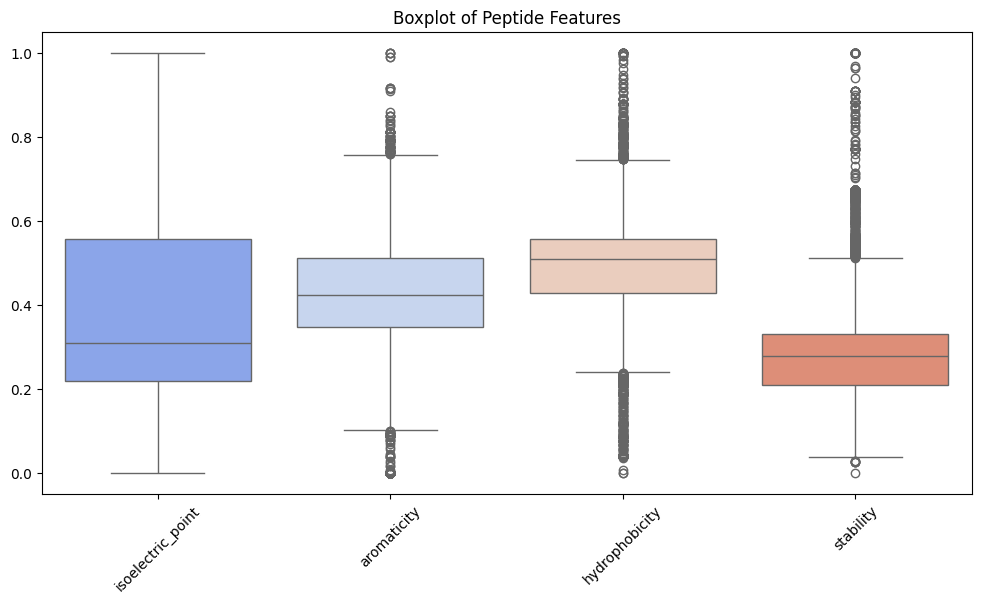

In [31]:
# Boxplot for peptide properties
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resampled[peptide_features], palette="coolwarm")
plt.title("Boxplot of Peptide Features")
plt.xticks(rotation=45)
plt.show()


In [32]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("peptide_analysis_results.csv")

# Define the peptide feature columns (modify if needed)
peptide_features = ['isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']

# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply outlier treatment to selected features
for col in peptide_features:
    cap_outliers(df, col)

# Save the cleaned data
df.to_csv("peptide_analysis_results_cleaned.csv", index=False)

print("Outliers handled successfully! Cleaned data saved as 'peptide_analysis_results_cleaned.csv'.")


Outliers handled successfully! Cleaned data saved as 'peptide_analysis_results_cleaned.csv'.


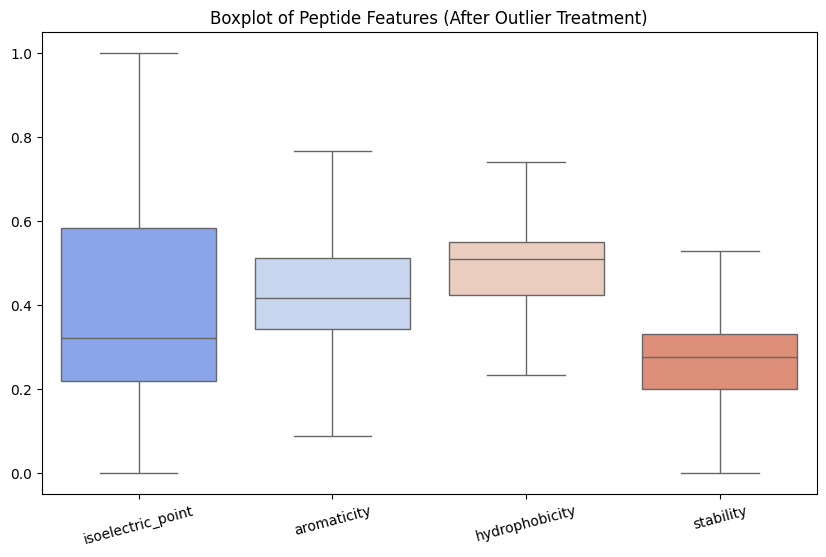

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df[peptide_features], palette="coolwarm")
plt.xticks(rotation=15)
plt.title("Boxplot of Peptide Features (After Outlier Treatment)")
plt.show()


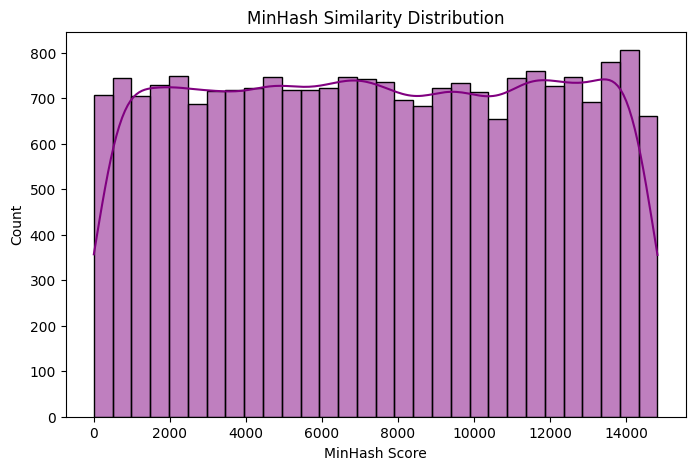

In [34]:
# Plot MinHash feature distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_resampled["minhash_signature"], bins=30, kde=True, color="purple")
plt.title("MinHash Similarity Distribution")
plt.xlabel("MinHash Score")
plt.show()


In [35]:
print(df_resampled.dtypes)


parent_protein_id                         int32
protein_seq                               int32
start_position                            int64
end_position                              int64
peptide_seq                               int32
chou_fasman                             float64
emini                                   float64
kolaskar_tongaonkar                     float64
parker                                  float64
isoelectric_point                       float64
aromaticity                             float64
hydrophobicity                          float64
stability                               float64
minhash_signature                         int32
Exact Match Exists                         bool
Appears as Subsequence (MHC Binding)       bool
Closest Peptide                           int32
Path Length                             float64
target                                    int64
dtype: object


In [41]:
print(df_resampled.dtypes)


parent_protein_id                         int32
protein_seq                               int32
start_position                            int64
end_position                              int64
peptide_seq                               int32
chou_fasman                             float64
emini                                   float64
kolaskar_tongaonkar                     float64
parker                                  float64
isoelectric_point                       float64
aromaticity                             float64
hydrophobicity                          float64
stability                               float64
minhash_signature                         int32
Exact Match Exists                        int32
Appears as Subsequence (MHC Binding)      int32
Closest Peptide                           int32
Path Length                             float64
target                                    int64
dtype: object


In [42]:
print(df_resampled.nunique())  # Check the number of unique values per column


parent_protein_id                         761
protein_seq                               758
start_position                           1552
end_position                             1545
peptide_seq                             14841
chou_fasman                              7547
emini                                   10222
kolaskar_tongaonkar                      7121
parker                                  10539
isoelectric_point                        7299
aromaticity                              7239
hydrophobicity                           7312
stability                                7312
minhash_signature                       14830
Exact Match Exists                          1
Appears as Subsequence (MHC Binding)        1
Closest Peptide                          9689
Path Length                              5181
target                                      2
dtype: int64


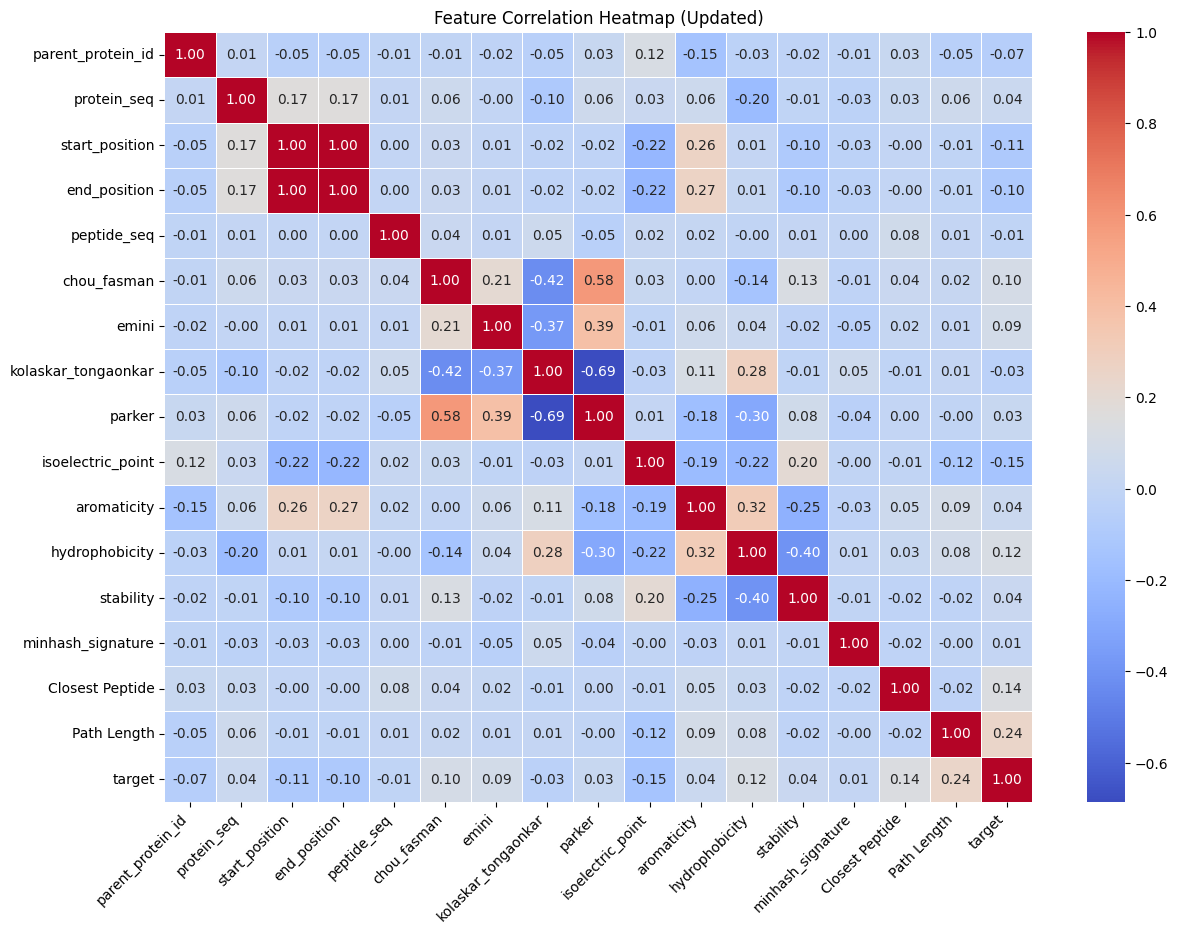

In [43]:
# Drop columns with only one unique value
df_corr = df_resampled.drop(columns=["Exact Match Exists", "Appears as Subsequence (MHC Binding)"], errors="ignore")

# Plot updated correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Correlation Heatmap (Updated)")
plt.show()


In [45]:
from scipy.stats import skew, kurtosis

# Define the features you want to analyze
features = df.select_dtypes(include=["int64", "int32", "float64"]).columns  # Select numerical columns

# Compute skewness and kurtosis
for feature in features:
    print(f"{feature} - Skewness: {skew(df[feature], nan_policy='omit')}, Kurtosis: {kurtosis(df[feature], nan_policy='omit')}")


start_position - Skewness: 2.813817370404395, Kurtosis: 10.260450372729137
end_position - Skewness: 2.8054894431480193, Kurtosis: 10.197292257629025
chou_fasman - Skewness: 0.2360518495601434, Kurtosis: 0.43802375633150703
emini - Skewness: 7.326857876585678, Kurtosis: 99.21324306049327
kolaskar_tongaonkar - Skewness: 0.1776928866832393, Kurtosis: 0.4149635810456358
parker - Skewness: -0.36062065155687123, Kurtosis: 1.3141364486520368
isoelectric_point - Skewness: 0.4982326703460097, Kurtosis: -0.8665619770060027
aromaticity - Skewness: -0.10291477834777572, Kurtosis: 0.025813447081024066
hydrophobicity - Skewness: -0.47979765680071274, Kurtosis: 0.46487690912654145
stability - Skewness: 0.6668705687361156, Kurtosis: 0.20525442651371684
target - Skewness: 1.0295853429129056, Kurtosis: -0.9399540216589144
Path Length - Skewness: 1.2105817110772086, Kurtosis: 1.4309923738856778


In [46]:
df["emini"] = np.log1p(df["emini"])  # log(1 + x) to avoid log(0)
df["start_position"] = np.log1p(df["start_position"])
df["end_position"] = np.log1p(df["end_position"])
df["Path Length"] = np.log1p(df["Path Length"])


In [48]:
df["target"] = np.sqrt(df["target"])


In [56]:
df["emini"] = np.sqrt(df["emini"])


In [57]:
from scipy.stats import skew, kurtosis

# Define the features you want to analyze
features = df.select_dtypes(include=["int64", "int32", "float64"]).columns  # Select numerical columns

# Compute skewness and kurtosis
for feature in features:
    print(f"{feature} - Skewness: {skew(df[feature], nan_policy='omit')}, Kurtosis: {kurtosis(df[feature], nan_policy='omit')}")


start_position - Skewness: -0.7532065407279135, Kurtosis: 1.0097287950843983
end_position - Skewness: -0.27362105364007805, Kurtosis: -0.16822067795031392
chou_fasman - Skewness: 0.2360518495601434, Kurtosis: 0.43802375633150703
emini - Skewness: -0.10551659703471306, Kurtosis: -0.8351645354508421
kolaskar_tongaonkar - Skewness: 0.1776928866832393, Kurtosis: 0.4149635810456358
parker - Skewness: -0.36062065155687123, Kurtosis: 1.3141364486520368
isoelectric_point - Skewness: 0.4982326703460097, Kurtosis: -0.8665619770060027
aromaticity - Skewness: -0.10291477834777572, Kurtosis: 0.025813447081024066
hydrophobicity - Skewness: -0.47979765680071274, Kurtosis: 0.46487690912654145
stability - Skewness: 0.6668705687361156, Kurtosis: 0.20525442651371684
target - Skewness: 1.0295853429129056, Kurtosis: -0.9399540216589144
Path Length - Skewness: 0.9290991650729408, Kurtosis: 0.7115254489894003


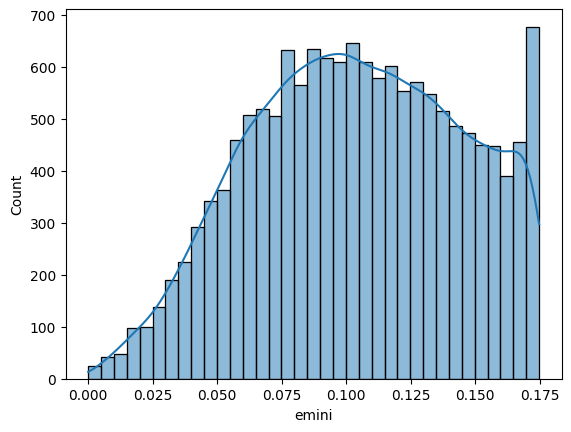

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["emini"], kde=True)
plt.show()


In [60]:
df_resampled.to_csv("../data/balanced_peptide_data.csv", index=False)
print("Balanced dataset saved successfully!")


Balanced dataset saved successfully!
